# Mn-K$\alpha$ line in EPIC-pn Full Frame mode

**Note:** for the boresights CCD#4 only taking the results for `RAWY` in [181:200], which is the last line in the results file.


In [1]:
import os
import glob
import csv
import pickle

%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
#import altair as alt

from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline


In [2]:
sline = "MnKa"
# folder with the monitoring results
ddir = '/xdata/xcaldata/XMM/PN/CTI/dat_RLM'
wdir = os.path.join(os.path.expanduser('~'),f'IVAN/{sline}-line')
# build a list of all subfolders:
obsids = [f for f in os.listdir(ddir) if os.path.isdir(os.path.join(ddir, f))]
nobsid = len(obsids)

## Merging all summary files in a table

Each sub-folder of `ddir` contains a summary file with information about the observation. I combine all this info in a table and save it for easy access to the relevant `OBS_ID`.

In [112]:
output_file = f'{wdir}/ff_obsids_list.csv'
fout = open(output_file,'w')
print ("rev,obsid,expo,omode,filter,start,end,duration",file=fout)
for i,iobs in enumerate(obsids):
    #
    sumfile = glob.glob(f"{ddir}/{iobs}/{iobs}*smry.txt")
    # first extract useful info for the OBS_ID from the summary file
    if (len(sumfile) == 0):
        print (f"No summary file for OBS_ID {iobs}. Skipping it.")
        continue
    if (i % 100 == 0):
        print (f"Saving summary for {iobs} ({i+1}/{nobsid})")
    with open(sumfile[0], 'r') as sfile:
        csvreader = csv.reader(sfile)
        for row in csvreader:
            if row[0] in (None, ""):
                continue
            else:
                summary = row[0].replace("'","").split()
        #
    print (summary[0:8],file=fout)
#
fout.close()

Saving summary for 0021540401 (1/1336)
Saving summary for 0112870701 (101/1336)
Saving summary for 0112972001 (201/1336)
Saving summary for 0411082701 (301/1336)
Saving summary for 0125320801 (401/1336)
Saving summary for 0406571001 (501/1336)
Saving summary for 0505384501 (601/1336)
Saving summary for 0552002701 (701/1336)
Saving summary for 0651373201 (801/1336)
Saving summary for 0671870601 (901/1336)
Saving summary for 0690752101 (1001/1336)
Saving summary for 9092100003 (1101/1336)
Saving summary for 0134921001 (1201/1336)
Saving summary for 0791780901 (1301/1336)
No summary file for OBS_ID 0803080101. Skipping it.


'PrimeFullWindow'

Now loop over all folders/obsids and get the Cu K$\alpha$ results. Skip files with zero length. Will check the boresight CCD 4 first

In [3]:
select_mode = "PrimeFullWindow"
list_file = f'{wdir}/ff_obsids_list.csv'
df = pd.read_csv(list_file)
df_sel = df.loc[df['omode'] == select_mode]
df_sel

,rev,obsid,expo,omode,filter,start,end,duration
3,481,37982901,S001,PrimeFullWindow,CalClosed,2002-07-25T05:58:17,2002-07-25T06:02:24,0.0
5,459,38140501,S005,PrimeFullWindow,CalClosed,2002-06-11T08:28:35,2002-06-11T08:32:44,248.3
7,396,2970501,S005,PrimeFullWindow,CalClosed,2002-02-05T15:54:40,2002-02-05T16:08:47,848.0
10,704,17740701,S003,PrimeFullWindow,CalClosed,2003-10-13T00:51:12,2003-10-13T01:19:39,1707.9
11,463,31740201,S005,PrimeFullWindow,CalClosed,2002-06-19T07:44:47,2002-06-19T07:57:15,747.1
12,377,2740601,S005,PrimeFullWindow,CalClosed,2001-12-29T17:58:16,2001-12-29T18:19:55,1299.6
13,703,17740601,S003,PrimeFullWindow,CalClosed,2003-10-11T00:59:42,2003-10-11T01:28:09,1708.2
16,380,42341501,S005,PrimeFullWindow,CalClosed,2002-01-04T17:46:53,2002-01-04T18:00:11,799.5
17,504,30540201,U002,PrimeFullWindow,CalClosed,2002-09-09T10:19:08,2002-09-09T10:43:49,1480.7
18,696,65820601,S015,PrimeFullWindow,CalClosed,2003-09-27T01:58:14,2003-09-27T02:16:54,1121.0


In [5]:
result = {}
for j in np.arange(1,13):
    result[j] = {'mnka': [], 'mnka_err1': [], 'mnka_err2': [], 'revol': [], 
                        'chi2': [], 'dof': [], 'chi2r': []}
    #
for iobs,irev in zip(df_sel.obsid,df_sel.rev):
    for iccd in np.arange(1,13):
        xfile = glob.glob(f"{ddir}/{iobs:010}/{iobs:010}*lmonCCD{iccd:02}_Mn-Ka.txt")
        if (len(xfile) > 0):
            with open(xfile[0], 'r') as datfile:
                csvreader = csv.reader(datfile)
                for row in csvreader:
                    if row[0] in (None, ""):
                        continue
                    else:
                        results = row[0].split()
            #
            result[iccd]['mnka'].append(float(results[4]))
            result[iccd]['mnka_err1'].append(float(results[5]))
            result[iccd]['mnka_err2'].append(float(results[6]))
            result[iccd]['chi2'].append(float(results[24]))
            result[iccd]['dof'].append(int(results[25]))
            if (int(results[25]) > 0):
                result[iccd]['chi2r'].append(float(results[24])/int(results[25]))
            else:
                result[iccd]['chi2r'].append(-9.0)
            result[iccd]['revol'].append(int(irev))
        #break
#
for j in np.arange(1,13):
    print (f"Found {len(result[j]['mnka'])} OBS_IDs with Mn Ka line results for mode {select_mode} for CCDNR == {j}")
#

Found 927 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 1
Found 918 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 2
Found 907 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 3
Found 936 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 4
Found 948 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 5
Found 945 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 6
Found 913 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 7
Found 931 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 8
Found 921 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 9
Found 865 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 10
Found 757 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 11
Found 595 OBS_IDs with Cu Ka line results for mode PrimeFullWindow for CCDNR == 12


In [6]:
resfile = f'{wdir}/ff_mnka_fit_results.pickle'
with open(resfile, 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

In [7]:
resfile = f'{wdir}/ff_mnka_fit_results.pickle'
with open(resfile, 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    result = pickle.load(f)

Selected 684/927 good fit results for CCD 1
Selected 635/918 good fit results for CCD 2
Selected 542/907 good fit results for CCD 3
Selected 717/936 good fit results for CCD 4
Selected 734/948 good fit results for CCD 5
Selected 747/945 good fit results for CCD 6
Selected 677/913 good fit results for CCD 7
Selected 715/931 good fit results for CCD 8
Selected 723/921 good fit results for CCD 9
Selected 566/865 good fit results for CCD 10
Selected 457/757 good fit results for CCD 11
Selected 336/595 good fit results for CCD 12


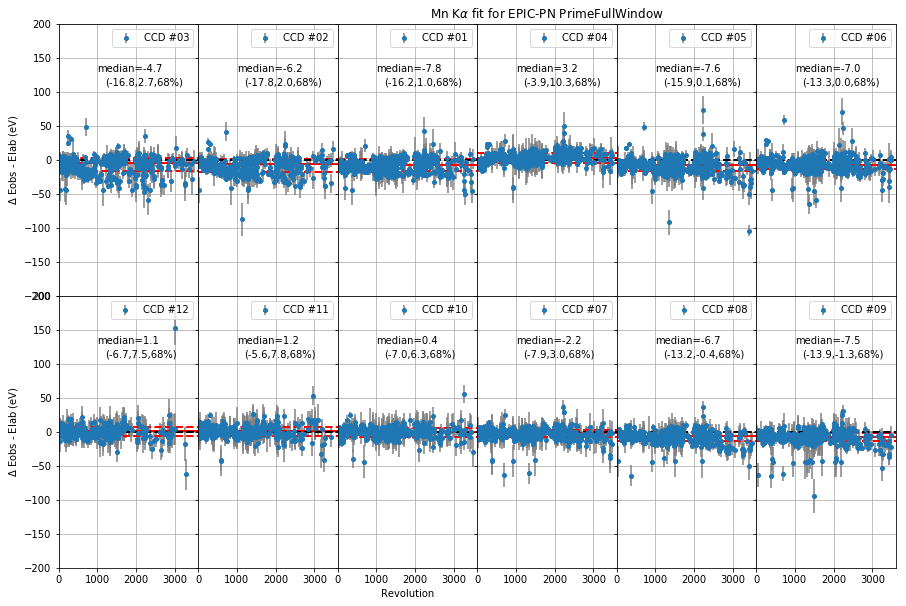

In [9]:

fig, axs = plt.subplots(2,6,sharex=True,sharey=True,figsize=(15,10))
#
chi2r_lim = 1.3
#
mapping = {1: [0,2], 2: [0,1], 3: [0,0], 4: [0,3], 5: [0,4], 6: [0,5],
          7: [1,3], 8: [1,4], 9: [1,5], 10: [1,2], 11: [1,1], 12: [1,0]}
#
runrev = np.arange(0.0,3500.0,200.0)
#
for j in np.arange(12):
    ccd = j + 1
    #
    #
    # filter only those with good fit, i.e. chi2r above chi2r_lim
    #
    #ix = np.where(np.asarray(result[ccd]['chi2r']) <= chi2r_lim)[0]
    # 
    uncert = (np.asarray(result[ccd]['mnka_err2']) - np.asarray(result[ccd]['mnka_err1']))*5
    ix = np.where((uncert <= 50.0) & (uncert > 0.0))[0]
    print (f"Selected {len(ix)}/{len(result[ccd]['chi2r'])} good fit results for CCD {ccd}")
    #
    xrev = np.asarray(result[ccd]['revol'])[ix]
    xcu = np.asarray(result[ccd]['mnka'])[ix]*5.0 # in eV
    xcu_e1 = np.asarray(result[ccd]['mnka_err1'])[ix]*5.0 # in eV
    xcu_e2 = np.asarray(result[ccd]['mnka_err2'])[ix]*5.0 # in eV
    diff = xcu - 5898.0 # in eV
    diff_err1 = xcu - xcu_e1
    diff_err2 = xcu_e2 - xcu
    diff_err = (diff_err1 + diff_err2)/2.0
    #
    # for the spline we need unique x and strictly increasing
    #qrev, inx = np.unique(xrev, return_index=True)
    #qdif = diff[inx]
    #qdiferr = diff_err[inx]
    #isort = qrev.argsort()
    #
    # smooth curve with univariate weighted spline
    #wxx = 1.0/np.power(qdiferr,2)
    #s = UnivariateSpline(qrev[isort], qdif[isort], w=wxx[isort], k=4,s=2)
    #z = np.polyfit(qrev[isort], qdif[isort], 1)
    #p = np.poly1d(z)
    #qresult = p(runrev)
    #qresult = s(runrev)
    #
    # get the median
    #
    med = np.quantile(diff,0.5)
    mplus = np.quantile(diff,0.84)
    mminus = np.quantile(diff,0.16)
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(xrev,diff,yerr=(diff_err1,diff_err2),fmt='o',
                                                  ms=4,ecolor='grey',label=f'CCD #{ccd:02}')
    #axs[mapping[ccd][0],mapping[ccd][1]].plot(runrev,qresult,color='red')
    axs[mapping[ccd][0],mapping[ccd][1]].axhline(med,color='red',lw=2)
    axs[mapping[ccd][0],mapping[ccd][1]].axhline(mplus,color='red',ls='dashed',lw=2)
    axs[mapping[ccd][0],mapping[ccd][1]].axhline(mminus,color='red',ls='dashed',lw=2)
    #axs[kj,k].plot(xrev,diff,'ok',label='')
    axs[mapping[ccd][0],mapping[ccd][1]].axhline(0.0,color='black',ls='dashed',lw=2)
    axs[mapping[ccd][0],mapping[ccd][1]].text(1000,130,f"median={med:.1f}")
    axs[mapping[ccd][0],mapping[ccd][1]].text(1200,110,f"({mminus:.1f},{mplus:.1f},68%)")
    #
    axs[mapping[ccd][0],mapping[ccd][1]].set_xlim((0,3600))
    axs[mapping[ccd][0],mapping[ccd][1]].set_ylim((-200.0,200.0))
    axs[mapping[ccd][0],mapping[ccd][1]].grid(True)
    axs[mapping[ccd][0],mapping[ccd][1]].legend(loc=1)
    if (ccd == 4):
        axs[mapping[ccd][0],mapping[ccd][1]].set_title(fr"Mn K$\alpha$ fit for EPIC-PN {select_mode}")
    if (ccd == 3 or ccd == 12):
        axs[mapping[ccd][0],mapping[ccd][1]].set_ylabel(r"$\Delta$ Eobs - Elab (eV)")
    if (ccd == 10):
        axs[mapping[ccd][0],mapping[ccd][1]].set_xlabel("Revolution")
#
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{wdir}/ff_mnka_monitoring_results.png",dpi=100)
#plt.savefig(f"{wdir}/../cuka_results_all_cti49_test51_plot.png",dpi=100)
#plt.savefig(f"{wdir}/../cuka_results_allccd_myproc_plot.png",dpi=100)
plt.show();
plt.close();

In [133]:
#d = {'rev': xrev, 'cuka': , 'cuka_err1': [float(x) for x in cuka_err1], 'cuka_err2': [float(x) for x in cuka_err2]}
#d = {'rev': xrev, 'cuka': , 'cuka_err1': [float(x) for x in cuka_err1], 'cuka_err2': [float(x) for x in cuka_err2]}
#df = pd.DataFrame(data=d)

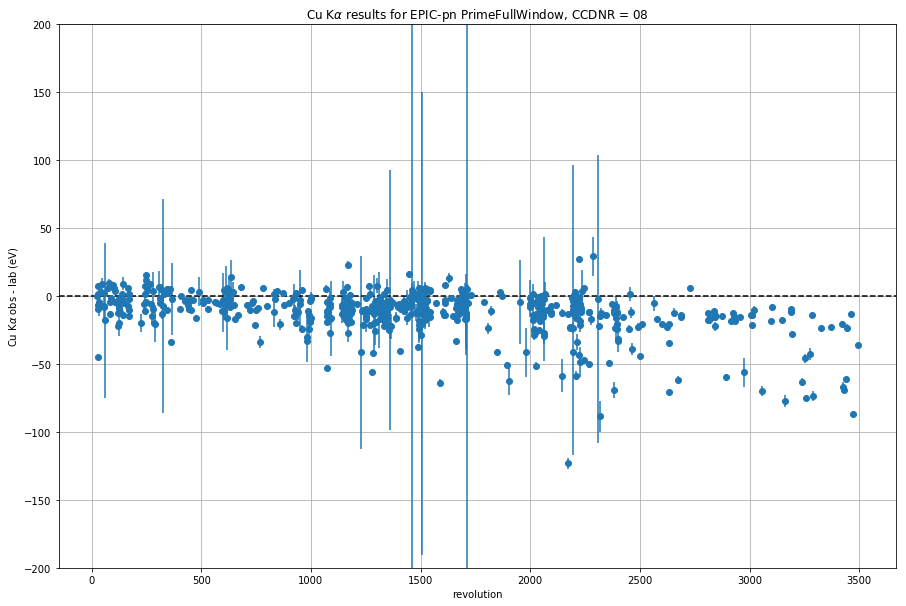

In [136]:
cuka0 = 8040 # lab energy in ADUs
diff = df.cuka*5.0 - cuka0
cukaerr1 = df.cuka - df.cuka_err1
cukaerr2 = df.cuka_err2 - df.cuka

# the base chart
#base = alt.Chart(df,title=r"Cu K$\alpha$ monitoring results",width=800,height=500).transform_calculate(
#    ymin="datum.cuka_err1",
#    ymax="datum.cuka_err2"
#)

#points = base.mark_circle(size=60).encode(
#    alt.X('rev',scale=alt.Scale(domain=(0,3500))),
#    alt.Y('cuka',scale=alt.Scale(domain=(1500,1800))),
#    tooltip=['rev', 'cuka','cuka_err1', 'cuka_err2']
#)

#points = alt.Chart(df,title=r"Cu K$\alpha$ monitoring results",width=800,height=500).mark_circle(size=60).encode(
#    alt.X('rev',scale=alt.Scale(domain=(0,3500))),
#    alt.Y('cuka',scale=alt.Scale(domain=(1500,1800))),
#    tooltip=['rev', 'cuka','cuka_err1', 'cuka_err2']
#).interactive()

# generate the error bars
#errorbars = base.mark_errorbar().encode(
#    x="rev",
#    y="ymin:Q",
#    y2="ymax:Q"
#)

#points
fig, ax = plt.subplots(figsize=(15,10))
ax.errorbar(df.rev,diff,yerr=(cukaerr1,cukaerr2),fmt='o')
ax.axhline(0.0,linestyle='dashed',color='black')
ax.set_ylim([-200,200])
ax.grid()
ax.set_xlabel('revolution')
ax.set_ylabel(r'Cu K$\alpha$ obs - lab (eV)');
ax.set_title(fr"Cu K$\alpha$ results for EPIC-pn {select_mode}, CCDNR = {ccdnr}")
plt.show();

In [48]:
diff.__class__

pandas.core.series.Series

In [62]:
dir(base)

['autosize',
 'background',
 'config',
 'data',
 'datasets',
 'description',
 'encoding',
 'height',
 'mark',
 'name',
 'padding',
 'projection',
 'selection',
 'title',
 'transform',
 'width']